# <u> 2012-2018 NBA Enhanced Box Score Final Project </u>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%pylab inline

import sklearn as sk

Populating the interactive namespace from numpy and matplotlib


# <u> 1. Data Set Description <u>

<ul>
<li> <b> df </b>is a dataset of player box score from 2012 to 2018 NBA season. Each row is a player's statistics in a single game </li>
    <li> <b> df3 </b> is the dataset focused on <b>starting players </b>.</li>
    <li> <b> df4 </b> is the dataset focused on each team's starters previous 5 games' performance.</li>
    <li> <b>df5 </b> is the final dataset used for building a decision tree. </li>
    <li> <b>df5 </b> is the final dataset used for building a decision tree. </li>
</ul>

Important columns in <b> df </b> are:
<ol>
 <li>teamRslt: If the game resulted in a win or loss. </li>
 <li>playPTS: Total points a player scored in a game. </li> 
 <li>play3PA: 3 point attempts made in a game </li>     
 <li>playMin: Player's total playing time in a game </li>
 <li>playAST: Player's total assists in a game</li>
 <li>playTO:  Player's total turnovers in a game </li>
    <li>playSTL: Player's total steals in a game </li>
    <li>playBLK: Player's total blocks in a game </li>
    <li>playPF: Player's total personal fouls a player committed</li>
    <li>playFGA: Player's total field goals attempted </li>
    <li>playFGM: Player's total field goals made </li>
    <li>play2PM: Player's total 2 pointers made in a game.</li>
    <li>play2PA: Player's total 2 point attempts made  in a game.</li>
    <li>play3PM: Player's total 3 pointers made in a game.</li>
    <li>playFTA: Player's total free throws attempted in a game</li>
    <li>playFTM: Player's total free throws made in a game</li>
    <li>playORB: Player's total offense rebounds in a game</li>
    <li>playTRB: Player's total rebouds in a game</li>
    


</ol>

In [2]:
df = pd.read_csv('2012-18_playerBoxScore.csv')

In [3]:
df.head()

,gmDate,gmTime,seasTyp,playLNm,playFNm,teamAbbr,teamConf,teamDiv,teamLoc,teamRslt,...,playFT%,playORB,playDRB,playTRB,opptAbbr,opptConf,opptDiv,opptLoc,opptRslt,opptDayOff
0,2012-10-30,19:00,Regular,Price,A.J.,WAS,East,Southeast,Away,Loss,...,1.0,1,1,2,CLE,East,Central,Home,Win,0
1,2012-10-30,19:00,Regular,Ariza,Trevor,WAS,East,Southeast,Away,Loss,...,0.5,1,2,3,CLE,East,Central,Home,Win,0
2,2012-10-30,19:00,Regular,Okafor,Emeka,WAS,East,Southeast,Away,Loss,...,0.5,5,2,7,CLE,East,Central,Home,Win,0
3,2012-10-30,19:00,Regular,Beal,Bradley,WAS,East,Southeast,Away,Loss,...,1.0,0,3,3,CLE,East,Central,Home,Win,0
4,2012-10-30,19:00,Regular,Booker,Trevor,WAS,East,Southeast,Away,Loss,...,0.0,1,0,1,CLE,East,Central,Home,Win,0


# <u> 2. Data Preparation </u>

In [7]:
df2 = df.copy()

In [8]:
df2.isna().sum()

gmDate         0
gmTime         0
seasTyp        0
playLNm        0
playFNm        0
teamAbbr       0
teamConf       0
teamDiv        0
teamLoc        0
teamRslt       0
teamDayOff     0
offLNm1        0
offFNm1        0
offLNm2        0
offFNm2        0
offLNm3       41
offFNm3       41
playDispNm     0
playStat       0
playMin        0
playPos        0
playHeight     0
playWeight     0
playBDate      0
playPTS        0
playAST        0
playTO         0
playSTL        0
playBLK        0
playPF         0
playFGA        0
playFGM        0
playFG%        0
play2PA        0
play2PM        0
play2P%        0
play3PA        0
play3PM        0
play3P%        0
playFTA        0
playFTM        0
playFT%        0
playORB        0
playDRB        0
playTRB        0
opptAbbr       0
opptConf       0
opptDiv        0
opptLoc        0
opptRslt       0
opptDayOff     0
dtype: int64

#### Drop all of the NA values since there are only 41 of them

In [9]:
df2 = df2.dropna(subset=['offLNm3','offFNm3'])

#### A team play at 'Home'=1, otherwise 0.
#### 'Win'=1, otherwise 0. 
#### TeamConf 'West'=1, otherwise 0.

In [10]:
df2['teamLoc'] = (df2.teamLoc == 'Home') * 1

In [11]:
df2['teamRslt'] = (df2.teamRslt == 'Win') * 1

In [12]:
df2['teamConf'] = (df2.teamConf == 'West') * 1

In [13]:
df2['opptConf'] = (df2.opptConf == 'West') * 1

#### Calculate player's age since we think this is a important attribute to our study

In [16]:
df2['player_age'] = df2.gmDate.astype(np.datetime64).dt.year - df2.playBDate.astype(np.datetime64).dt.year

In [17]:
df3 = df2.copy()

#### In the game of basketball, there are five starters and several bench players. In general, starters have a much larger influence in the result of a game. Thus, we want to find the relationship between them and the game result and drop all of the rows containing bench players.

In [18]:
df3.drop(df2.index[df2.playStat == 'Bench'],inplace=True)

#### Drop all of the columns that are not useful to our study.

In [19]:
df3.drop(columns = ['seasTyp','playLNm','playFNm','offLNm1','offFNm1','offLNm2',\
                    'offFNm2','offLNm3','offFNm3','playDispNm','playBDate','opptAbbr',\
                    'opptLoc','playStat','playPos','opptRslt','playDRB','teamDiv','opptDiv'],inplace=True)

#### Since we want to check five starters whole impact on team results we sum some of the stats(PTS, AST,STL,ETC...) and take average of others(HEIGHT, WEIGHT, FG%) 

In [20]:
df4 = df3.groupby(['teamAbbr','gmDate'])['playMin','playPTS','playAST','playTO','playSTL','playBLK','playPF','playFGA','playFGM','play2PA','play2PM','play3PA','play3PM',\
'playFTA','playFTM','playORB','playTRB'].sum().reset_index()

#### We create a new column(dummy variable) called season, which represents different seasons from our dataset. This variable will come in handy when we start to do groupby later.

In [22]:
df4['season'] = df4.gmDate.apply(lambda x: '2012' if x < ('2013-05-01') else '2013' if x < ('2014-05-01')\
                 else '2014' if x < ('2015-05-01') else '2015' if x < ('2016-05-01')\
                 else '2016' if x < ('2017-05-01') else '2017').tolist()

#### We want to see how every team's starters past 5 games' performance will affect the team result in this game. So we want to do the shift and rolling in order to achieve that.

In [26]:
df4[['playMin','playPTS','playAST','playTO','playSTL','playBLK','playPF','playFGA','playFGM',\
      'play2PA','play2PM','play3PA','play3PM','playFTA','playFTM','playORB','playTRB']] \
                                    = df4.groupby(['teamAbbr','season'])['playMin','playPTS','playAST','playTO',\
                                   'playSTL','playBLK','playPF','playFGA','playFGM',\
                                   'play2PA','play2PM','play3PA','play3PM',\
                                   'playFTA','playFTM','playORB','playTRB'].shift(1).rolling(5).mean()

#### Add statistics like shooting percentage, age, and height to our final dataset. We need to take average value of those numbers.

In [28]:
df4['play2P%'] = df3.groupby(['teamAbbr','gmDate'])['play2P%'].mean().tolist()

In [29]:
df4['play3P%'] = df3.groupby(['teamAbbr','gmDate'])['play3P%'].mean().tolist()

In [30]:
df4['playFG%'] = df3.groupby(['teamAbbr','gmDate'])['playFG%'].mean().tolist()

In [31]:
df4['playFT%'] = df3.groupby(['teamAbbr','gmDate'])['playFT%'].mean().tolist()

In [32]:
df4['playHeight'] = df3.groupby(['teamAbbr','gmDate'])['playHeight'].mean().tolist()

In [33]:
df4['playWeight'] = df3.groupby(['teamAbbr','gmDate'])['playWeight'].mean().tolist()

In [34]:
df4['player_age'] = df3.groupby(['teamAbbr','gmDate'])['player_age'].mean().tolist()

In [35]:
df4[['play2P%','play3P%','playFG%','playFT%','playHeight','playWeight','player_age']] =\
df4.groupby(['teamAbbr','season'])['play2P%','play3P%','playFG%','playFT%','playHeight','playWeight','player_age']\
.shift(1).rolling(5).mean()

#### Add the rest of the attributes (teamRslt, teamLoc, teamConf, etc...) to df4. Those attributes do not need to take the average of the previous 5 games result.

In [46]:
df4['teamRslt'] = df3.groupby(['teamAbbr','gmDate'])['teamRslt'].mean().tolist()

In [47]:
df4['teamLoc'] = df3.groupby(['teamAbbr','gmDate'])['teamLoc'].mean().tolist()

In [48]:
df4['teamConf'] = df3.groupby(['teamAbbr','gmDate'])['teamConf'].mean().tolist()

In [49]:
df4['opptConf'] = df3.groupby(['teamAbbr','gmDate'])['opptConf'].mean().tolist()

In [50]:
df4['teamDayOff'] = df3.groupby(['teamAbbr','gmDate'])['teamDayOff'].mean().tolist()

In [51]:
df4['opptDayOff'] = df3.groupby(['teamAbbr','gmDate'])['opptDayOff'].mean().tolist()

In [52]:
df4['teamDayOff'] = df3.groupby(['teamAbbr','gmDate'])['teamDayOff'].mean().tolist()

In [53]:
df4

,teamAbbr,gmDate,playMin,playPTS,playAST,playTO,playSTL,playBLK,playPF,playFGA,...,playFT%,playHeight,playWeight,player_age,teamRslt,teamLoc,teamConf,opptConf,teamDayOff,opptDayOff
0,ATL,2012-11-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,0,1,0,2
1,ATL,2012-11-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,0,0,1,2,2
2,ATL,2012-11-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1,1,0,0,3,2
3,ATL,2012-11-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,0,0,2,2
4,ATL,2012-11-11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,0,1,2,3
5,ATL,2012-11-12,150.8,54.8,13.6,9.0,4.4,3.8,9.2,51.6,...,0.316000,79.00,216.84,27.48,1,0,0,1,1,2
6,ATL,2012-11-14,154.6,57.6,13.8,9.4,4.6,3.2,9.4,51.8,...,0.379332,79.08,218.16,27.56,0,0,0,1,2,4
7,ATL,2012-11-16,159.6,56.2,15.0,10.0,5.2,3.8,9.2,51.0,...,0.386000,79.12,217.16,27.64,1,0,0,1,2,3
8,ATL,2012-11-19,161.4,60.6,15.2,10.8,5.0,4.2,9.6,51.6,...,0.478000,79.12,217.16,27.64,1,1,0,0,3,1
9,ATL,2012-11-21,155.8,57.8,15.2,11.2,5.8,3.8,8.8,50.6,...,0.454000,79.04,215.84,27.56,1,1,0,0,2,2


# <u> 3. Interesting Finding Summary </u>

Generally, older teams have a better chance of winning because they have more experience and young teams with mostly young starters usually have a losing record below 50%. But we discovered one interesting finding from our decision tree suggesting the opposite. When starting five players' average age is lower than 27.1 for the past five games, they are more likely to lose. However, if they can score an average of more than 70 points in the past 5 games the team acutally has a 50.8% chance of winning, which is quite surpurising and impressive for a young team. 


In [33]:
age = df4[df4.gmDate > '2018-04-01']

Interesting Finding: Average age for 2018 NBA playoff teams(Best 16 teams in the league): 28.08

In [34]:
age[(age.teamAbbr == 'GS') | (age.teamAbbr == 'HOU') | \
    (age.teamAbbr == 'OKC') | (age.teamAbbr == 'POR') | \
    (age.teamAbbr == 'UTA') | (age.teamAbbr == 'MIN') |\
   (age.teamAbbr == 'SA') | (age.teamAbbr == 'NO') |
    (age.teamAbbr == 'CLE') | (age.teamAbbr == 'TOR') |
    (age.teamAbbr == 'PHI') | (age.teamAbbr == 'WAS') |
    (age.teamAbbr == 'BOS') | (age.teamAbbr == 'IND') |
    (age.teamAbbr == 'MIA') | (age.teamAbbr == 'MIL') ].player_age.mean()

28.08543209876532

# <u> 4. Machine Learning: Decision Tree </u>

In [55]:
df5 = df4.copy()

In [56]:
df5 = df5.drop(columns = ['gmDate','teamAbbr','season','teamLoc'])

In [57]:
df5 = df5.dropna(how='any')

#### I detected my finding by training the following decision tree with teamRslt(binary variable: win or lose) as target attribute.

In [58]:
X = df5.drop(columns = 'teamRslt')

In [59]:
Y = df5.teamRslt

In [60]:
import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')

In [61]:
dt = tree.DecisionTreeClassifier(max_depth = 2)

In [62]:
dt.fit(X,Y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

#### Decision tree interpretation:
<ol>
<li> If starting five players' average age in the past five games is smaller than 27.1, most likely in class 1(Lose). </li>
<li> If starting five players' average age in the past five games is smaller than 27.1 and score an average total points of less than 71, most likely in class 1(Lose). </li>
<li> If starting five players' average age in the past five games is smaller than 27.1 and score an average total points of greater than 71, most likely in class 0(Win).</li>

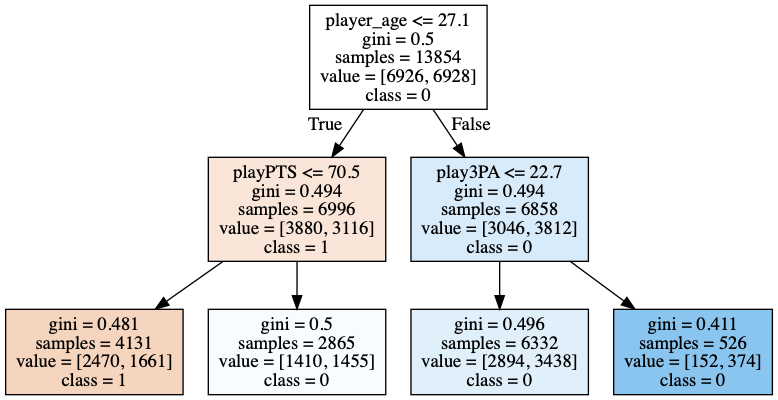

In [63]:
dt_feature_names = list(X.columns)
dt_target_names = np.array(Y.unique(),dtype=np.str) 
tree.export_graphviz(dt, out_file='tree.dot', 
    feature_names=dt_feature_names, class_names=dt_target_names,
    filled=True)  
graph = pydotplus.graph_from_dot_file('tree.dot')
Image(graph.create_png())

# <u> 5. Validity of the Finding </u>

In [69]:
df6 = df5.copy()

#### Breaking up the age groups and average total points

In [70]:
df6['binned_age'] = pd.cut(df6['player_age'], bins=[18,27,35])

In [71]:
df6['binned_playPTS'] = pd.cut(df6['playPTS'], bins=[40,71,100])

In [72]:
df6['binned_play3PA'] = pd.cut(df6['play3PA'], bins=[5,22.6,50])

In [73]:
table = df6.groupby(['binned_age','binned_playPTS'])['teamRslt'].mean()

#### According to the table when young starters score an average of more than 70 points in the past 5 games they would increase their chance of winning by more than 10 percent, compare to old starters who could only increase by roughly 5 percent.

In [74]:
table

binned_age  binned_playPTS
(18, 27]    (40, 71]          0.403823
            (71, 100]         0.511194
(27, 35]    (40, 71]          0.534166
            (71, 100]         0.587685
Name: teamRslt, dtype: float64

#### To validate teams with older starters have a better chance of winning

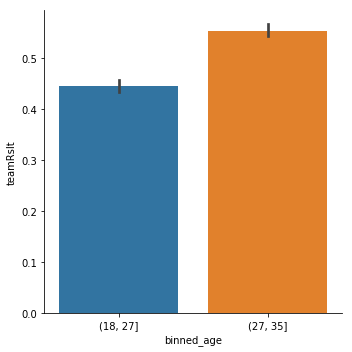

In [75]:
sns.catplot(data=df6, x='binned_age', y='teamRslt', kind='bar')

#### To validate our interesting finding: Teams with young starters can have a winning record if the starters can score an average of more than 70 points the previous 5 games

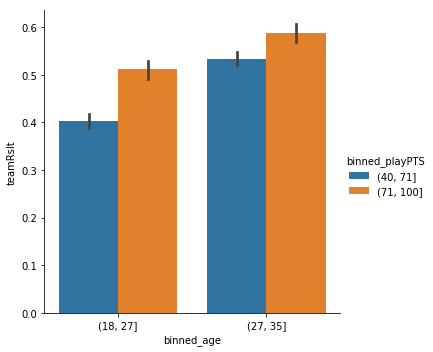

In [52]:
sns.catplot(data=df6, x='binned_age', y='teamRslt',hue='binned_playPTS', kind='bar')

#### Interesting but not as strong as last finding. Attempt more three pointers can actually increase a team's winning percentage, especially for teams with older starters.

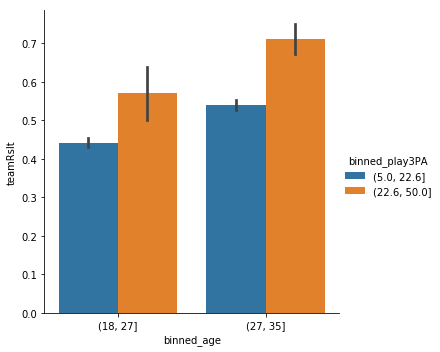

In [53]:
sns.catplot(data=df6, x='binned_age', y='teamRslt',hue='binned_play3PA', kind='bar')

# <u> 6.  Managerial Insights</u>

Fun facts: 
<ol> <li>Youngest 5 teams' winning percentage in NBA last season is only 43.4%.  </li>
<li>The two teams attend the 2018 NBA Finals, Cleveland Cavaliers and Golden State Warriors, have average starters' age of 31.2 and 29.2. More than that, the sixteen teams who made the 2018 NBA playoffs have an average age of 28.1.</li>
</ol>

When a team's young starters play well, score more than 70 points to be specific, the team actually have a positive winning possibility. This is quite surpurising as young teams seldom perform well in the NBA because of lack of experience. However, there might be several reasons for this to occur and below are two suggestions we would love to give out to NBA coaches : 
<ol> <li> Young players are generally more athletic, energetic, and quicker than old players. Older players are usually more experienced and know how to finish a close game. Thus, if a team with young starters can play aggresive from start of the game and build a large lead they would be in a much better position to win the game.  </li>
<li> It's very rare for a young player to play at all-star level and score lots of points in 5 consecutive games. Therefore, one of the more likely reason for young starters to score more than 70 points is that they are sharing the ball very well and getting everyone involved. By achieving this strategy each starters would have a chance to score more and increase the possibility of winning for their team. </li>
</ol>
